# Muli-Layer perceptron.

In [94]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [95]:
df = pd.read_csv("data.csv")
x = df.iloc[:,1:14].values
y = df.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
    test_size=0.25, random_state= 20)

# Validation and Testing before hyperparameters Tuning

In [96]:
# Create an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(90, 90), activation='identity', solver='adam', random_state=42)

# cross-validation

In [112]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(mlp, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.75722543 0.9132948  0.88439306 0.90116279 0.94767442]
Mean CV Score: 0.8807501008200027


In [98]:
mlp.fit(x_train, y_train)

MLPClassifier(activation='identity', hidden_layer_sizes=(90, 90),
              random_state=42)

In [99]:
y_pred = mlp.predict(x_val)

In [100]:
print("Multi-Layer Perceptron Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred))
print("Precision:", metrics.precision_score(y_val , y_pred))
print("F1 score:",metrics.f1_score(y_val , y_pred))
print("Recall:", metrics.recall_score(y_val , y_pred))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred))

Multi-Layer Perceptron Validation classifier results:
Accuracy: 0.9075144508670521
Precision: 0.75
F1 score: 0.4285714285714285
Recall: 0.3
ROC score: 0.6434640522875817


In [101]:
y_pred2 = mlp.predict(x_test)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred2))
print("Precision:", metrics.precision_score(y_test , y_pred2))
print("F1 score:",metrics.f1_score(y_test , y_pred2))
print("Recall:", metrics.recall_score(y_test , y_pred2))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred2))

SVM Validation classifier results:
Accuracy: 0.930635838150289
Precision: 0.9375
F1 score: 0.7142857142857143
Recall: 0.5769230769230769
ROC score: 0.7850601779173207


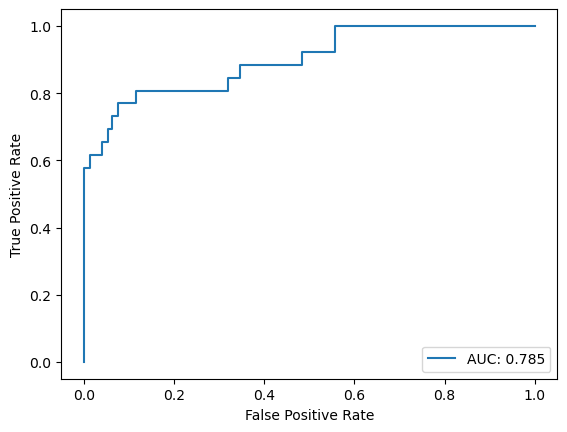

In [102]:
from sklearn.metrics import RocCurveDisplay
y_pred_proba = mlp.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)


plt.plot(fpr, tpr, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# MLP Tuning

In [103]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(90, 90), (100, 100), (110, 100)],
    'activation': ['relu', 'identity'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}
grid = GridSearchCV(mlp, param_grid, cv=5)

In [104]:
# fitting the model for grid search
grid.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=MLPClassifier(activation='identity',
                                     hidden_layer_sizes=(90, 90),
                                     random_state=42),
             param_grid={'activation': ['relu', 'identity'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(90, 90), (100, 100),
                                                (110, 100)],
                         'solver': ['adam', 'sgd']})

In [105]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (110, 100), 'solver': 'adam'}
MLPClassifier(alpha=0.001, hidden_layer_sizes=(110, 100), random_state=42)


# Testing and Vlidation after hyperparameters Tuning


In [106]:
from sklearn.model_selection import cross_val_score
# Create an MLP classifier
mlp2 = MLPClassifier(hidden_layer_sizes=(110, 100), activation='relu', solver='adam', random_state=42)


Cross-Validation Scores: [0.9017341  0.87861272 0.97109827 0.97093023 0.96511628]
Mean CV Score: 0.937498319666622


# Cross Validation

In [116]:
# Perform cross-validation
cv_scores2 = cross_val_score(mlp2, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores2)
print("Mean CV Score:", cv_scores2.mean())

Cross-Validation Scores: [0.9017341  0.87861272 0.97109827 0.97093023 0.96511628]
Mean CV Score: 0.937498319666622
0.9017341040462428


In [107]:
mlp2.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(110, 100), random_state=42)

In [108]:
y_pred3 = mlp2.predict(x_val)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_val , y_pred3))
print("Precision:", metrics.precision_score(y_val , y_pred3))
print("F1 score:",metrics.f1_score(y_val , y_pred3))
print("Recall:", metrics.recall_score(y_val , y_pred3))
print("ROC score:", metrics.roc_auc_score(y_val , y_pred3))

SVM Validation classifier results:
Accuracy: 0.9653179190751445
Precision: 0.8888888888888888
F1 score: 0.8421052631578948
Recall: 0.8
ROC score: 0.8934640522875817


y_pred4 = mlp2.predict(x_test)
print("SVM Validation classifier results:")
print("Accuracy:", metrics.accuracy_score(y_test , y_pred4))
print("Precision:", metrics.precision_score(y_test , y_pred4))
print("F1 score:",metrics.f1_score(y_test , y_pred4))
print("Recall:", metrics.recall_score(y_test , y_pred4))
print("ROC score:", metrics.roc_auc_score(y_test , y_pred4))

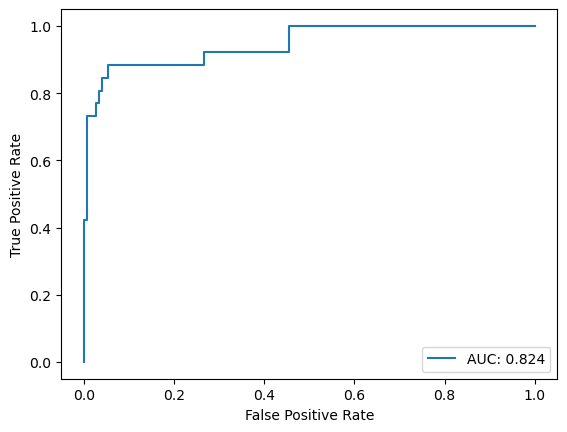

In [109]:
y_pred_proba2 = mlp2.predict_proba(x_test)[::, 1]
fpr2, tpr2, _2 = metrics.roc_curve(y_test, y_pred_proba2)
plt.plot(fpr2, tpr2, label="AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred4),3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Performance comparison

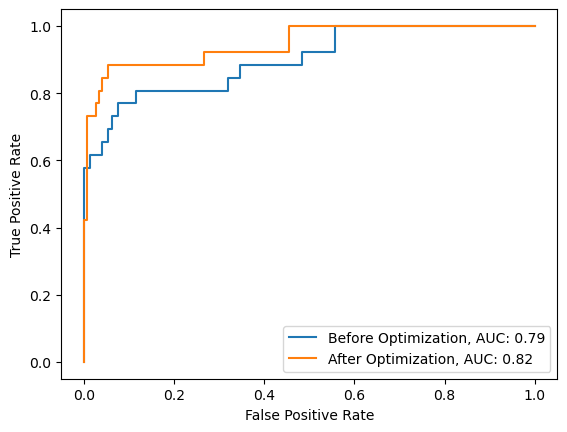

In [110]:
plt.plot(fpr, tpr, label="Before Optimization, AUC: " + str(round(metrics.roc_auc_score(y_test, y_pred2),2)))
plt.plot(fpr2, tpr2, label="After Optimization, AUC: " +str(round(metrics.roc_auc_score(y_test, y_pred4),2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Accuracy change

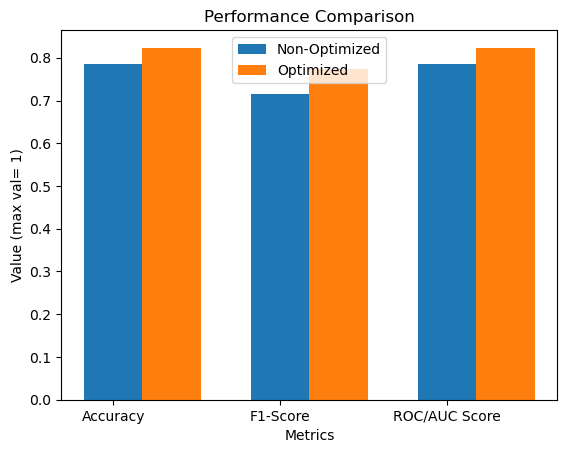

In [111]:
initACC =  metrics.roc_auc_score(y_test, y_pred2)
finalACC = metrics.roc_auc_score(y_test, y_pred4)

initF1 =  metrics.f1_score(y_test, y_pred2)
finalF1 = metrics.f1_score(y_test, y_pred4)

initROC = metrics.roc_auc_score(y_test, y_pred2)
finalROC = metrics.roc_auc_score(y_test, y_pred4)

data1 = np.array([finalACC, finalF1, finalROC])
data2 = np.array([initACC,initF1, initROC])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1)), data2, bar_width, label='Non-Optimized')

# Plot the second set of bars
ax.bar(np.arange(len(data2)) + bar_width, data1, bar_width, label='Optimized')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1)))
ax.set_xticklabels(['Accuracy', 'F1-Score', 'ROC/AUC Score'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()

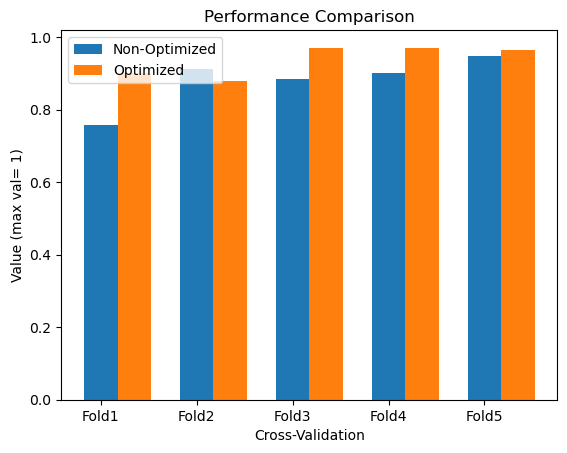

In [123]:
Score1_before_tuning =  cv_scores[0]
Score1_after_tuning =  cv_scores2[0]

Score2_before_tuning =  cv_scores[1]
Score2_after_tuning =  cv_scores2[1]

Score3_before_tuning =  cv_scores[2]
Score3_after_tuning =  cv_scores2[2]

Score4_before_tuning =  cv_scores[3]
Score4_after_tuning =  cv_scores2[3]

Score5_before_tuning =  cv_scores[4]
Score5_after_tuning =  cv_scores2[4]

data1 = np.array([Score1_before_tuning, Score2_before_tuning, Score3_before_tuning, Score4_before_tuning,Score5_before_tuning])
data2 = np.array([Score1_after_tuning, Score2_after_tuning, Score3_after_tuning, Score4_after_tuning, Score5_after_tuning])

# Set the width of the bars
bar_width = 0.35

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Plot the first set of bars
ax.bar(np.arange(len(data1)), data1, bar_width, label='Non-Optimized')

# Plot the second set of bars
ax.bar(np.arange(len(data2)) + bar_width, data2, bar_width, label='Optimized')

# Set the x-tick labels
ax.set_xticks(np.arange(len(data1)))
ax.set_xticklabels(['Fold1', 'Fold2', 'Fold3','Fold4', 'Fold5'])

# Add a legend
ax.legend()

# Set the axis labels and title
ax.set_xlabel('Cross-Validation')
ax.set_ylabel('Value (max val= 1)')
ax.set_title('Performance Comparison')

# Show the plot
plt.show()